# Hello world

Basic pandas hacking based on [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/version/0.24/getting_started/10min.html), [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/version/0.24/getting_started/basics.html) articles

## Imports
Pandas works on the top of numpy - and can also work with numpy so it is useful to import also numpy

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data series
DataSeries in 1d data structure (list of scalars)

In [2]:
s = pd.Series([1,2,3,4,5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

Date range (6 days) as a Series

In [3]:
s_date_range = pd.date_range('20180328', periods=6)
s_date_range

DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02'],
              dtype='datetime64[ns]', freq='D')

## Data Frame
DataFrame is 2d data structure (list of data series)

In [4]:
df = pd.DataFrame(np.random.rand(5,5))
df

,0,1,2,3,4
0,0.713428,0.618151,0.229913,0.446276,0.758560
1,0.819598,0.404202,0.023563,0.720383,0.660694
2,0.005669,0.976246,0.200132,0.247947,0.034395
3,0.810332,0.342980,0.836721,0.912189,0.388979
4,0.856497,0.372018,0.439497,0.221848,0.100705


## Column headers
Headers can be added to DataFrame by using `columns` parameter or by passing a map instead of list during creation of DataFrame

using `coulumns` parameter

In [5]:
df_with_headers = pd.DataFrame(
    np.random.rand(5,5), 
    columns = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
)

df_with_headers

,First,Second,Third,Fourth,Fifth
0,0.230636,0.749685,0.915436,0.002727,0.445115
1,0.792763,0.533858,0.083893,0.423566,0.150741
2,0.348368,0.149487,0.040618,0.886258,0.325057
3,0.215236,0.163187,0.450109,0.377342,0.247117
4,0.725822,0.533809,0.333405,0.831080,0.037023


Passing map:

In [6]:
df_with_headers_2 = pd.DataFrame({
    'First Column': np.random.rand(5),
    'Second Column': np.random.rand(5)
})

df_with_headers_2

,First Column,Second Column
0,0.232918,0.724865
1,0.599783,0.518178
2,0.698159,0.317993
3,0.182286,0.244684
4,0.396331,0.134752


## Index

Data Frame with custom index (rows "header")

In [7]:
df_with_renamed_index = pd.DataFrame(
    np.random.rand(5,5),
    index = ['row1', 'row2', 'row3', 'row4', 'row5']
)
df_with_renamed_index

,0,1,2,3,4
row1,0.400256,0.557741,0.215447,0.324426,0.828249
row2,0.657899,0.848598,0.334529,0.148715,0.278455
row3,0.813617,0.461623,0.429980,0.229841,0.989378
row4,0.983894,0.258822,0.632484,0.486888,0.416682
row5,0.052962,0.785604,0.280236,0.074057,0.051171


## Inspecting data frames

Checking `dtype` of columns (`dtype` is numpy class containing information about type of data)

In [8]:
df_to_inspect = pd.DataFrame(
    np.random.rand(4,4),
    columns = ['1st', '2nd', '3rd', '4th']
)
df_to_inspect
df_to_inspect.dtypes

1st    float64
2nd    float64
3rd    float64
4th    float64
dtype: object

Seeing information about index

In [9]:
df_to_inspect.index

RangeIndex(start=0, stop=4, step=1)

Seeing first n results

In [10]:
df_to_inspect.head(3)

,1st,2nd,3rd,4th
0,0.736530,0.172039,0.966906,0.923015
1,0.639028,0.090695,0.857570,0.679344
2,0.784763,0.059775,0.450456,0.629729


Seeing last n results

In [100]:
df_to_inspect.tail(3)

,1st,2nd,3rd,4th
1,0.639028,0.090695,0.857570,0.679344
2,0.784763,0.059775,0.450456,0.629729
3,0.264249,0.296644,0.266332,0.694547


In [101]:
df_to_inspect.shape

(4, 4)

In [102]:
df_to_inspect.index

RangeIndex(start=0, stop=4, step=1)

Convert data to numpy array

In [103]:
df_to_inspect.columns

Index(['1st', '2nd', '3rd', '4th'], dtype='object')

In [104]:
df_to_inspect.index.array

<PandasArray>
[0, 1, 2, 3]
Length: 4, dtype: int64

In [12]:
df_to_inspect.to_numpy()

array([[0.73652998, 0.17203888, 0.96690562, 0.92301532],
       [0.63902848, 0.09069518, 0.85757004, 0.67934417],
       [0.78476316, 0.05977518, 0.45045614, 0.6297289 ],
       [0.26424938, 0.29664373, 0.26633187, 0.69454677]])

In [105]:
df_to_inspect.mean()

1st    0.606143
2nd    0.154788
3rd    0.635316
4th    0.731659
dtype: float64

Quick, basic statistic analysis of columns

In [13]:
df_to_inspect.describe()

,1st,2nd,3rd,4th
count,4.000000,4.000000,4.000000,4.000000
mean,0.606143,0.154788,0.635316,0.731659
std,0.235852,0.105761,0.331497,0.130539
min,0.264249,0.059775,0.266332,0.629729
25%,0.545334,0.082965,0.404425,0.666940
50%,0.687779,0.131367,0.654013,0.686945
75%,0.748588,0.203190,0.884904,0.751664
max,0.784763,0.296644,0.966906,0.923015


# DataFrame operations

Transposing

In [14]:
df = pd.DataFrame(
    np.random.rand(6,6),
    columns = ['One', 'Two', 'Three', 'Four', 'Five', 'Six']
)
df.T

,0,1,2,3,4,5
One,0.674116,0.753914,0.528776,0.700617,0.625669,0.186769
Two,0.941925,0.925317,0.116811,0.057609,0.887635,0.392635
Three,0.755602,0.815510,0.147615,0.654370,0.013960,0.712974
Four,0.090872,0.854772,0.131246,0.912301,0.890945,0.690875
Five,0.720230,0.473706,0.861171,0.612305,0.390106,0.863675
Six,0.593443,0.983682,0.185557,0.958955,0.000684,0.633827


## Rearanging DataFrame

Sorting columns

In [15]:
df = pd.DataFrame(
    np.random.rand(6,6),
    columns = ['One', 'Two', 'Three', 'Four', 'Five', 'Six']
)
df

,One,Two,Three,Four,Five,Six
0,0.338683,0.332459,0.720043,0.134523,0.211016,0.913438
1,0.700341,0.892687,0.057704,0.397769,0.201614,0.839656
2,0.677322,0.918145,0.404310,0.996944,0.100697,0.169380
3,0.579410,0.583701,0.060370,0.149119,0.568688,0.716520
4,0.370790,0.346233,0.588401,0.966859,0.690087,0.982749
5,0.092610,0.986069,0.635551,0.720254,0.046051,0.500467


In [16]:
df.sort_index(axis=1, ascending=False)

,Two,Three,Six,One,Four,Five
0,0.332459,0.720043,0.913438,0.338683,0.134523,0.211016
1,0.892687,0.057704,0.839656,0.700341,0.397769,0.201614
2,0.918145,0.404310,0.169380,0.677322,0.996944,0.100697
3,0.583701,0.060370,0.716520,0.579410,0.149119,0.568688
4,0.346233,0.588401,0.982749,0.370790,0.966859,0.690087
5,0.986069,0.635551,0.500467,0.092610,0.720254,0.046051


Sorting by values in column

In [17]:
df.sort_values(by='Three')

,One,Two,Three,Four,Five,Six
1,0.700341,0.892687,0.057704,0.397769,0.201614,0.839656
3,0.579410,0.583701,0.060370,0.149119,0.568688,0.716520
2,0.677322,0.918145,0.404310,0.996944,0.100697,0.169380
4,0.370790,0.346233,0.588401,0.966859,0.690087,0.982749
5,0.092610,0.986069,0.635551,0.720254,0.046051,0.500467
0,0.338683,0.332459,0.720043,0.134523,0.211016,0.913438


# Selection of data

Select column by label

In [18]:
df_selection = pd.DataFrame(
    np.random.rand(6,6),
    columns = ['One', 'Two', 'Three', 'Four', 'Five', 'Six']
)

df_selection['Two']

0    0.715184
1    0.109698
2    0.419948
3    0.198020
4    0.197403
5    0.172211
Name: Two, dtype: float64

Select rows by index

In [19]:
df_selection[0:1]

,One,Two,Three,Four,Five,Six
0,0.507503,0.715184,0.084703,0.413965,0.616682,0.34745


Selection of rows and columns

In [20]:
df_selection.loc[1:2,['Two']]

,Two
1,0.109698
2,0.419948


Select scalar

In [21]:
df_selection.loc[1:1,['Three']]

,Three
1,0.359872


Select row by position

In [22]:
df_selection.iloc[2]

One      0.113432
Two      0.419948
Three    0.038198
Four     0.782601
Five     0.676210
Six      0.246625
Name: 2, dtype: float64

Select rows and columns by position

In [23]:
df_selection.iloc[1:3,2:4]

,Three,Four
1,0.359872,0.257905
2,0.038198,0.782601


Select exact rows and columns

In [24]:
df_selection.iloc[[1,2,5], [2,4]]

,Three,Five
1,0.359872,0.985548
2,0.038198,0.676210
5,0.836077,0.100007


Getting Scalar by position

In [25]:
df_selection.iloc[1,2]

0.35987232335520325

In [26]:
df_selection.iat[1,2]

0.35987232335520325

Select row with predicate

In [27]:
df_selection[df_selection.Two > 0.2]

,One,Two,Three,Four,Five,Six
0,0.507503,0.715184,0.084703,0.413965,0.616682,0.347450
2,0.113432,0.419948,0.038198,0.782601,0.676210,0.246625


Select values with predicate

In [28]:
df_selection[df_selection > 0.2]

,One,Two,Three,Four,Five,Six
0,0.507503,0.715184,NaN,0.413965,0.616682,0.347450
1,0.717553,NaN,0.359872,0.257905,0.985548,NaN
2,NaN,0.419948,NaN,0.782601,0.676210,0.246625
3,0.857086,NaN,0.900981,NaN,0.701910,0.324006
4,0.600242,NaN,0.670544,0.758892,0.493873,0.840047
5,0.665168,NaN,0.836077,0.862865,NaN,NaN


## Setting 

In [29]:
df_setting = pd.DataFrame(
    np.random.rand(7,7),
    columns = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']
)

Setting scalar

In [30]:
df_setting.iat[0,1]=10
df_setting

,One,Two,Three,Four,Five,Six,Seven
0,0.700858,10.000000,0.813527,0.147991,0.726909,0.629051,0.805337
1,0.029630,0.054248,0.273999,0.292847,0.008307,0.820352,0.896074
2,0.190251,0.069055,0.940960,0.644428,0.623693,0.240319,0.637038
3,0.692417,0.208122,0.193951,0.783866,0.390900,0.831976,0.751050
4,0.679633,0.028296,0.044597,0.931194,0.417099,0.621348,0.229365
5,0.090996,0.184890,0.618135,0.604474,0.840401,0.696864,0.313122
6,0.564289,0.756844,0.921145,0.988546,0.364491,0.833597,0.053708


Setting column

In [31]:
df_setting.loc[:, 'Four'] = np.array([17] * len(df_setting))
df_setting

,One,Two,Three,Four,Five,Six,Seven
0,0.700858,10.000000,0.813527,17,0.726909,0.629051,0.805337
1,0.029630,0.054248,0.273999,17,0.008307,0.820352,0.896074
2,0.190251,0.069055,0.940960,17,0.623693,0.240319,0.637038
3,0.692417,0.208122,0.193951,17,0.390900,0.831976,0.751050
4,0.679633,0.028296,0.044597,17,0.417099,0.621348,0.229365
5,0.090996,0.184890,0.618135,17,0.840401,0.696864,0.313122
6,0.564289,0.756844,0.921145,17,0.364491,0.833597,0.053708


Setting with predicate

In [32]:
df_setting[df_setting > 0.2] = -df_setting
df_setting

,One,Two,Three,Four,Five,Six,Seven
0,-0.700858,-10.000000,-0.813527,-17,-0.726909,-0.629051,-0.805337
1,0.029630,0.054248,-0.273999,-17,0.008307,-0.820352,-0.896074
2,0.190251,0.069055,-0.940960,-17,-0.623693,-0.240319,-0.637038
3,-0.692417,-0.208122,0.193951,-17,-0.390900,-0.831976,-0.751050
4,-0.679633,0.028296,0.044597,-17,-0.417099,-0.621348,-0.229365
5,0.090996,0.184890,-0.618135,-17,-0.840401,-0.696864,-0.313122
6,-0.564289,-0.756844,-0.921145,-17,-0.364491,-0.833597,0.053708


In [33]:
df_setting2 = df_setting.reindex(columns=list(df.columns) + ['Eight'])
df_setting2

,One,Two,Three,Four,Five,Six,Eight
0,-0.700858,-10.000000,-0.813527,-17,-0.726909,-0.629051,NaN
1,0.029630,0.054248,-0.273999,-17,0.008307,-0.820352,NaN
2,0.190251,0.069055,-0.940960,-17,-0.623693,-0.240319,NaN
3,-0.692417,-0.208122,0.193951,-17,-0.390900,-0.831976,NaN
4,-0.679633,0.028296,0.044597,-17,-0.417099,-0.621348,NaN
5,0.090996,0.184890,-0.618135,-17,-0.840401,-0.696864,NaN
6,-0.564289,-0.756844,-0.921145,-17,-0.364491,-0.833597,NaN


Drop all rows with Nan

In [34]:
df_setting2.dropna(how='any')

,One,Two,Three,Four,Five,Six,Eight


Fill nan

In [35]:
df_setting2.fillna(value=5)

,One,Two,Three,Four,Five,Six,Eight
0,-0.700858,-10.000000,-0.813527,-17,-0.726909,-0.629051,5.0
1,0.029630,0.054248,-0.273999,-17,0.008307,-0.820352,5.0
2,0.190251,0.069055,-0.940960,-17,-0.623693,-0.240319,5.0
3,-0.692417,-0.208122,0.193951,-17,-0.390900,-0.831976,5.0
4,-0.679633,0.028296,0.044597,-17,-0.417099,-0.621348,5.0
5,0.090996,0.184890,-0.618135,-17,-0.840401,-0.696864,5.0
6,-0.564289,-0.756844,-0.921145,-17,-0.364491,-0.833597,5.0


In [36]:
pd.isna(df_setting2)

,One,Two,Three,Four,Five,Six,Eight
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True
6,False,False,False,False,False,False,True


## Operations

In [37]:
df_operations = pd.DataFrame(
    np.random.rand(4,4),
    columns = ['One', 'Two', 'Three', 'Four']
)


mean of each column

In [38]:
df_operations.mean()

One      0.487784
Two      0.643590
Three    0.566105
Four     0.549822
dtype: float64

mean of each row

In [39]:
df_operations.mean(1)

0    0.637301
1    0.566092
2    0.429024
3    0.614886
dtype: float64

Apply function to the data

In [40]:
df_operations.apply(lambda x: x + 100)

,One,Two,Three,Four
0,100.381805,100.853918,100.919835,100.393645
1,100.237309,100.758748,100.332816,100.935497
2,100.593469,100.052980,100.508239,100.561407
3,100.738554,100.908716,100.503532,100.308741


Histogram

In [41]:
df_operations['Two'].value_counts()

0.853918    1
0.908716    1
0.052980    1
0.758748    1
Name: Two, dtype: int64

## Data merge

Concatenation of data

In [44]:
df_first = pd.DataFrame(np.random.randn(5, 5))
df_second = pd.DataFrame(np.random.randn(5, 5))

pd.concat([df_first, df_second])

,0,1,2,3,4
0,0.722462,1.037063,0.389623,-0.701663,0.351536
1,0.051041,1.263521,0.268868,1.148054,1.611295
2,-0.438221,1.444325,0.651020,-0.411676,0.774951
3,-0.626716,1.046182,0.698395,0.704122,-1.420065
4,0.601580,-0.286285,-1.196085,0.007939,1.764640
0,-0.035671,-0.641669,-0.879749,-0.845624,-0.520431
1,-0.607700,1.232203,-0.742929,-1.291500,0.201834
2,-1.703643,-0.548787,-0.743655,2.082762,0.649242
3,0.028776,0.689789,-0.652835,-0.751253,-0.735779
4,-0.369760,-1.398047,0.642530,0.449042,1.374778


join (merge)

In [49]:
df_leftside = pd.DataFrame(
    {'PERSON_ID': [1,2], 
     'PERSON_NAME': ['Michal', 'Kevin']}
)

df_rightside = pd.DataFrame(
    { 'PHONE_ID': [1,2,3], 
     'PERSON_ID': [1,2,1],
    'PHONE': ['11111111', '22222222', '33333']}
)

pd.merge(df_leftside, df_rightside, on='PERSON_ID')


,PERSON_ID,PERSON_NAME,PHONE_ID,PHONE
0,1,Michal,1,11111111
1,1,Michal,3,33333
2,2,Kevin,2,22222222


append

In [51]:
df_first_append = pd.DataFrame(np.random.randn(5, 5))
df_second_append = pd.DataFrame(np.random.randn(5, 5))

df_first_append.append(df_second_append, ignore_index=True)

,0,1,2,3,4
0,-1.024461,0.514402,-1.734252,-0.170163,1.372532
1,-0.827168,-0.624870,0.779602,-0.976004,-0.333123
2,0.172425,-1.342826,0.105118,-0.072360,0.269371
3,-0.913058,-0.235651,-0.757585,-0.634669,0.699576
4,-0.941533,0.222763,-1.427127,0.394512,-1.345891
5,-0.274089,0.896941,-0.283430,0.577927,-0.020183
6,0.400205,-0.358388,0.192660,-0.015592,0.032467
7,0.214224,0.357329,0.620759,-0.068441,-2.179958
8,1.616762,-1.247280,0.936337,-1.593502,0.586961
9,0.229598,1.171234,-1.511513,0.362493,-0.555019


# Grouping

In [54]:
df_group = pd.DataFrame(
    {'type': ['A', 'A', 'B', 'A', 'B'],
    'value': [1,2,3,4,5]}
)

df_group.groupby('type').sum()

,value
type,
A,7
B,8


In [58]:
df_group = pd.DataFrame(
    {'type': ['A', 'A', 'B', 'A', 'B'],
    'value': [1,2,3,4,5]}
)
df_group.stack()

0  type     A
   value    1
1  type     A
   value    2
2  type     B
   value    3
3  type     A
   value    4
4  type     B
   value    5
dtype: object

## Timeseries

In [59]:
rng = pd.date_range('1/1/2018', periods=120, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [61]:
ts.resample('1Min').sum()

2018-01-01 00:00:00    13754
2018-01-01 00:01:00    14110
Freq: T, dtype: int64

## Categorical data

In [63]:
df_categories = pd.DataFrame(
    {'id': [1,2,3,4,5],
    'type': ['A', 'A', 'B', 'C', 'C']}
)

df_categories

,id,type
0,1,A
1,2,A
2,3,B
3,4,C
4,5,C


In [72]:
df_categories['type'] = df_categories['type'].astype('category')
df_categories['type'].cat.categories = ['TypeA', 'TypeB', 'TypeC']
df_categories

,id,type
0,1,TypeA
1,2,TypeA
2,3,TypeB
3,4,TypeC
4,5,TypeC


In [74]:
df_categories.sort_values(by='type')

,id,type
0,1,TypeA
1,2,TypeA
2,3,TypeB
3,4,TypeC
4,5,TypeC


In [75]:
df_categories.groupby('type').size()

type
TypeA    2
TypeB    1
TypeC    2
dtype: int64

## Plots

In [87]:
df_plot = pd.DataFrame(
    np.random.randn(100, 2), 
    index = pd.date_range('1/1/2018', periods=100),
    columns = ['First', 'Second']
)

df_plot = df_plot.cumsum()
df_plot

,First,Second
2018-01-01,0.735610,-0.268857
2018-01-02,0.731979,-0.339222
2018-01-03,0.048759,-1.092685
2018-01-04,0.993862,-0.210658
2018-01-05,0.481876,0.001697
2018-01-06,1.163746,-0.987507
2018-01-07,1.748480,-2.055468
2018-01-08,2.815835,-1.314307
2018-01-09,4.041209,-1.731511
2018-01-10,4.635659,-2.733123


<Figure size 432x288 with 0 Axes>

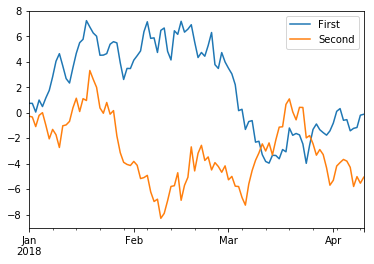

In [88]:
plt.figure()
df_plot.plot()
plt.legend(loc="best")